In [1]:
import pprint
import pandas as pd
import numpy as np


from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor
from sklearn.metrics import log_loss, make_scorer
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV


matchup_data = pd.read_csv("data/matchup_data.csv")

x_data = matchup_data[['diff_assists', 'diff_denies', 'diff_first_blood', 'diff_gpm', 'diff_healing', 'diff_hero_damage', 'diff_kills', 'diff_last_hits', 'diff_match_duration', 'diff_total_levels', 'diff_tower_damage', 'diff_xpm']]
y_data = matchup_data.radiant_winner

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size = 0.33, random_state = 14)
gbc = GradientBoostingClassifier(n_estimators=10000,learning_rate= .01,max_depth= 10, random_state=14)
gbc.fit(x_train, y_train)
prediction = dict()
prediction['Gradient Boost'] = gbc.predict(x_test)

print(f"log loss = {log_loss(y_test, gbc.predict_proba(x_test)[:, 1])}")
print(f"accuracy = {gbc.score(x_test, y_test)}")


log loss = 8.537739713014235
accuracy = 0.5634920634920635


In [2]:
gbc.score(x_test, y_test)

0.5634920634920635

In [3]:
from sklearn.model_selection import cross_validate
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

In [16]:
cv_scores = cross_val_score(gbc, x_test, y_test,cv=3,scoring='accuracy')

In [17]:
cv_scores

array([0.6744186 , 0.66666667, 0.56097561])

In [18]:
cv_scores.mean()

0.634020293691309

In [19]:
confusion_matrix(y_test, prediction['Gradient Boost'])

array([[28, 30],
       [25, 43]])

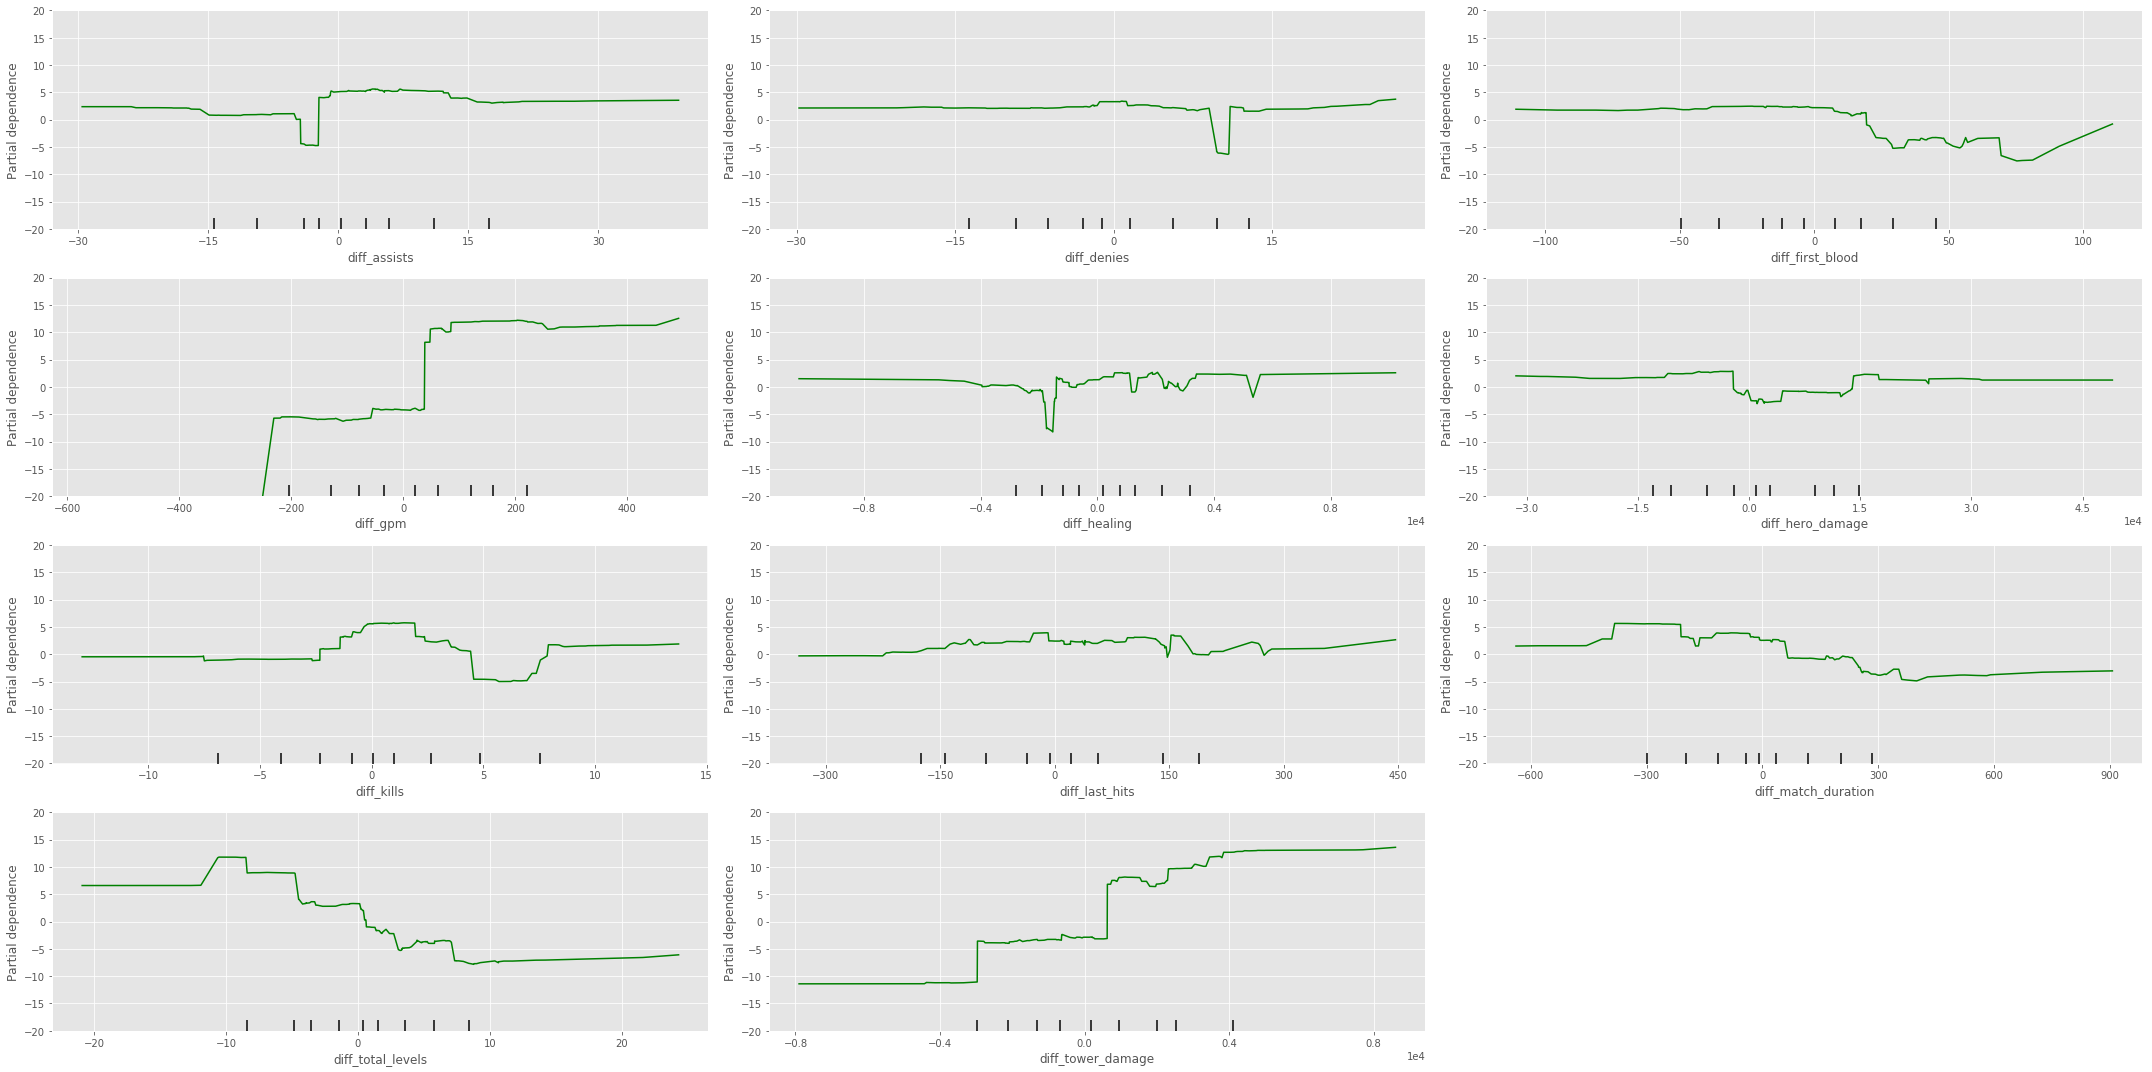

In [20]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')

from sklearn.ensemble.partial_dependence import plot_partial_dependence

var_names = x_train.columns[:-1]
features = list(range(x_train.shape[1]))
features = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

fig, axs = plot_partial_dependence(gbc, x_train, features,
                                       feature_names=var_names,
                                       n_jobs=3, grid_resolution=250, figsize=(30, 15))
for ax in axs:
    ax.set_ylim([-20, 20])
fig.tight_layout()

In [21]:
gbc.feature_importances_

array([ 7.44558918e+21,  3.39136287e+11, -1.58231557e+12, -2.99617505e+19,
        3.29579284e+20, -6.77992449e+11,  1.18158857e+12, -1.13040844e+12,
       -7.62535970e+21,  6.09871454e+10, -1.19847014e+20,  9.04030801e+11])

In [22]:
#higher the better 

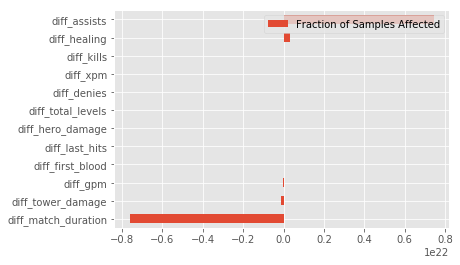

In [23]:
feat_scores = pd.DataFrame({'Fraction of Samples Affected' : gbc.feature_importances_},
                           index=x_train.columns)
feat_scores = feat_scores.sort_values(by='Fraction of Samples Affected')
feat_scores.plot(kind='barh')